Introduce the conversation for the images analyzed in main.ipynb, to try to infere more about the network needs of the actors on the pictured scenario

In [2]:
import cv2
import constants # to use the constants defined in the constants.py file
import os
from google import genai # to use the GenAI API
from pydantic import BaseModel# to enforce a .JSON output schema to the model
import supervision as sv

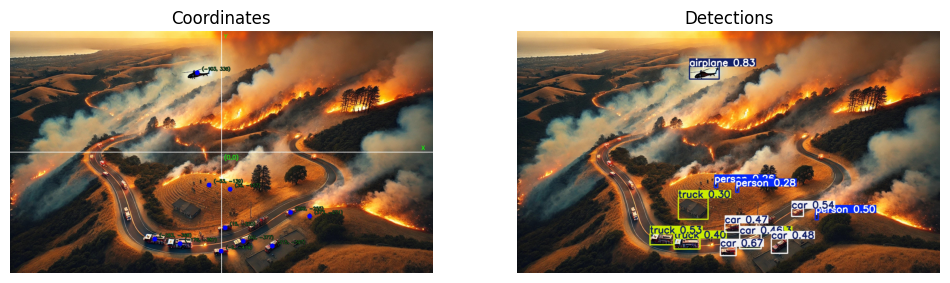

In [3]:
img_coordinades = cv2.imread("Images/Results/fire_0_coordinates.jpg")
img_detections = cv2.imread("Images/Results/fire_0_detections.jpg")


sv.plot_images_grid(
    images=[img_coordinades, img_detections],
    grid_size=(1, 2),
    titles=["Coordinates", "Detections"],
)

In [4]:
client = genai.Client(api_key=constants.API_KEY)
model_name="gemini-2.5-pro-exp-03-25"

conversation_file = client.files.upload(file="Images/fire_0.txt")
object_coordinates = client.files.upload(file="object_coordinates.txt")

In [5]:
prompt = """
         You are supervisioning a network in a disaster scenario, and you have access to comunications made by the firefighters in these scenario, additionaly you have access to the coordinates of all the firefighters
         Verify if with the conversation you can infere the network needs of the firefighters, and if so, provide a the needs of that firefighter (high, medium, low) and the respective coordinates of the firefighter
        """
        
        
response = client.models.generate_content(
    model=model_name,
    contents=[conversation_file, object_coordinates,prompt],
)

print(response.text)

Okay, let's analyze the communication log to infer network needs.

Based on the conversation:

1.  **Unit 4 (-53, -139):**
    *   **Activities:** On scene at an active, rapidly advancing fire, reporting critical conditions (fire behavior, ember spotting, multiple ignitions), identifying immediate threats (structure), **providing a live video feed** (high bandwidth uplink requirement), reporting significant escalations (containment jump, wind shift, structural collapse), requesting resources, and receiving orders.
    *   **Inference:** This unit is heavily reliant on the network for multiple critical functions simultaneously: reliable voice communication for urgent reports and requests, and high-bandwidth, stable data transmission for the live video feed requested by Command for assessment. The dynamic and hazardous nature of their situation requires constant, reliable connectivity.
    *   **Network Need:** **High**
    *   **Coordinates:** (-53, -139)

2.  **Command (215, -397):**
 

In [6]:
with open("main/Results/prompt_response_pair_sound.txt", "a") as file:
    file.write("Prompt:\n")
    file.write(prompt)
    file.write("\n\nResponse:\n")
    file.write(response.candidates[0].content.parts[0].text)
    file.write("\n\n======================================================================================================\n")
    file.close()